In [75]:
import warnings
warnings.filterwarnings(action='ignore',)

In [89]:
# Core:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Machine Learning Algorithms"

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score


# Dataset Handle
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV)
from sklearn.preprocessing import StandardScaler


# Performance:
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report)

from sklearn.metrics import accuracy_score, \
        confusion_matrix, \
        roc_auc_score,\
        average_precision_score,\
        roc_curve, f1_score, recall_score, matthews_corrcoef, auc


In [90]:
X_kmer = np.load('K-mer.npy')
X_revk = np.load('rev-k-mer.npy')
X_gapk = np.load('gapped_k_mer.npy')

In [91]:
Y  = [1 for i in range(490)]
Y += [0 for i in range(591)]
Y = np.array(Y)
print(Y.shape)

(1081,)


In [92]:
X = np.concatenate((X_kmer,X_revk, X_gapk),axis=1)

In [93]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

print(X.shape)
print(Y.shape)

(1081, 760)
(1081,)


In [94]:
X

array([[36, 25, 36, ...,  5,  9, 11],
       [46, 25, 41, ...,  4,  6,  3],
       [30, 32, 32, ...,  5,  9, 12],
       ...,
       [48, 27, 26, ...,  8,  5,  8],
       [46, 17, 45, ...,  1,  9,  3],
       [33, 24, 32, ...,  5,  8, 18]])

In [95]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=101)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [97]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(),
    SVC(kernel='rbf', probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
]

In [98]:
def auROCplot():
    ### auROC ###
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Random')
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    # plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')

    plt.savefig('auROC_classifier.png', dpi=100)
    plt.show()

Classifier: LogisticRegression, Accuracy: 0.67
Sensitivity: 0.62
Specificity: 0.71
MCC: 0.33
Precision: 0.64
_____________________________________________________

Classifier: KNeighborsClassifier, Accuracy: 0.69
Sensitivity: 0.56
Specificity: 0.80
MCC: 0.36
Precision: 0.70
_____________________________________________________

Classifier: DecisionTreeClassifier, Accuracy: 0.66
Sensitivity: 0.62
Specificity: 0.69
MCC: 0.31
Precision: 0.63
_____________________________________________________

Classifier: SVC, Accuracy: 0.76
Sensitivity: 0.57
Specificity: 0.91
MCC: 0.52
Precision: 0.85
_____________________________________________________

Classifier: GaussianNB, Accuracy: 0.72
Sensitivity: 0.60
Specificity: 0.82
MCC: 0.44
Precision: 0.74
_____________________________________________________

Classifier: RandomForestClassifier, Accuracy: 0.76
Sensitivity: 0.56
Specificity: 0.93
MCC: 0.54
Precision: 0.88
_____________________________________________________

Classifier: AdaBoostClassifie

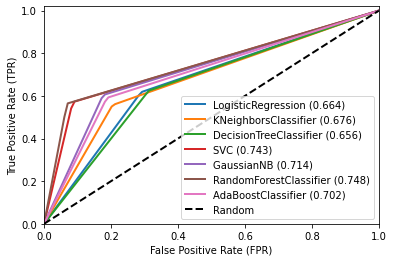

In [101]:
for classifier in classifiers:
    model = classifier
    model.fit(Xtrain, Ytrain)

    # Task-1: 70/30
    Yp = model.predict(Xtest)

    #
    auROC = []

    mean_TPR = 0.0
    mean_FPR = np.linspace(0, 1, 100)

    FPR, TPR, _ = roc_curve(Ytest, Yp)
    mean_TPR += np.interp(mean_FPR, FPR, TPR)
    mean_TPR[0] = 0.0
    roc_auc = auc(FPR, TPR)

    auROC.append(roc_auc_score(Ytest, Yp))
    mean_TPR[-1] = 1.0
    mean_auc = auc(mean_FPR, mean_TPR)
    plt.plot(
    mean_FPR,
    mean_TPR,
    linestyle='-',
    label='{} ({:0.3f})'.format(classifier.__class__.__name__, mean_auc), lw=2.0)
    
    #

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    CM = confusion_matrix(y_pred=Yp, y_true=Ytest)
    TN, FP, FN, TP = CM.ravel()

    MCC.append(matthews_corrcoef(y_true=Ytest, y_pred=Yp))
    Sensitivity.append( TP / (TP + FN) )
    Specificity.append( TN / (TN + FP) )
    Precision.append(precision_score(y_true=Ytest, y_pred=Yp))

    accuracy = accuracy_score(y_true=Ytest, y_pred=Yp)
    print('Classifier: {}, Accuracy: {:0.2f}'.format(classifier.__class__.__name__, accuracy))
    print('Sensitivity: {0:.2f}'.format(np.mean(Sensitivity)))
    print('Specificity: {0:.2f}'.format(np.mean(Specificity)))
    print('MCC: {0:.2f}'.format(np.mean(MCC)))
    print('Precision: {0:.2f}'.format(np.mean(Precision)))
    
    # from sklearn.metrics import confusion_matrix
    # print(confusion_matrix(Ytest, Yp))

    print('_____________________________________________________')
    print()
auROCplot()  